We'll try to generate a good CV (reaction coordinate) for the Markovnikov hydrobromination of propene. This CV will take the form of a linear expansion of simple distances, namely, all internal distances of the H, Br, and the vinylic C atoms.

To do this, we first run dynamics in the two states of interest (reactant and product states) and record the values of all CVs in our basis set. As an illustration we plot three representative CVs:
* The H-Br distance ($d_1$)
* The H-C1 distance ($d_2$)
* The H-C2 distance ($d_4$)

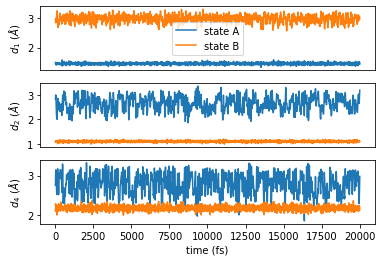

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.loadtxt('1/colvar', skiprows=1, usecols=0)
d1_1 = np.loadtxt('1/colvar', skiprows=1, usecols=1)
d2_1 = np.loadtxt('1/colvar', skiprows=1, usecols=2)
d4_1 = np.loadtxt('1/colvar', skiprows=1, usecols=4)
d1_2 = np.loadtxt('2/colvar', skiprows=1, usecols=1)
d2_2 = np.loadtxt('2/colvar', skiprows=1, usecols=2)
d4_2 = np.loadtxt('2/colvar', skiprows=1, usecols=4)

plt.subplot(3, 1, 1)
plt.plot(t,d1_1,label = "state A")
plt.plot(t,d1_2,label = "state B")
plt.ylabel("$d_1$ ($\AA$)")
plt.legend()
plt.xticks([])

plt.subplot(3, 1, 2)
plt.plot(t,d2_1)
plt.plot(t,d2_2)
plt.ylabel("$d_2$ ($\AA$)")
plt.xticks([])

plt.subplot(3, 1, 3)
plt.plot(t,d4_1)
plt.plot(t,d4_2)
plt.ylabel("$d_4$ ($\AA$)")
plt.xlabel("time (fs)")

plt.show()

As you can see, $d_1$ and $d_2$, which are physically sensible values (one bond that breaks, one that is formed) seem to do a good job discriminating between the two states. $d_4$ doesn't really, which is also reasonable. But what's the relative weight now?

This is where HLDA kicks in. An optimal expansion of the CV $\chi$ in the basis set $\mathbf{d}$ can be obtained by solving a generalize eigenvalue problem involving the mean $\boldsymbol{\mu}$ and multivariate variance $\boldsymbol{\Sigma}$ of these descriptors in each state. This results in the following expansion:
$$
  \chi = (\boldsymbol{\mu}_A - \boldsymbol{\mu}_B)^T \left ( \frac{1}{\boldsymbol{\Sigma}_A} + \frac{1}{\boldsymbol{\Sigma}_B} \right ) \mathbf{d} 
$$

As you can see in the file <code>hlda.out</code>, the estimated coefficients associated with the largest eigenvalue yield the CV $\chi = 0.661 d_1 - 0.656 d_2 - 0.328 d_3 + 0.011 d_4 - 0.021 d_5 + 0.157 d_6$. If you're a chemist you can have some fun rationalizing these numbers.

So let's look at biasing efficiency. In principle, it seems that $d_1$ is perfectly capable of cleanly separating states, so it's definitely a good *order parameter*. But is it also a good reaction coordinate? Let's compare with $\chi$ (we'll use $\chi$ in both cases to track the process):

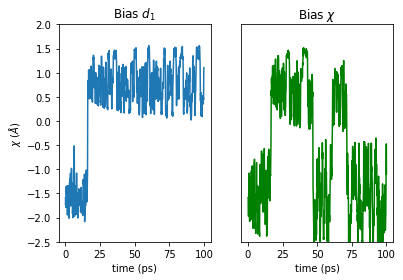

In [2]:
t = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=0)
d1_d1 = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=1)
d2_d1 = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=2)
d3_d1 = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=3)
chi_d1 = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=7)
bias_d1 = np.loadtxt('bias_d1/colvar', skiprows=1, usecols=8)
d1_chi = np.loadtxt('bias_chi/colvar', skiprows=1, usecols=1)
d2_chi = np.loadtxt('bias_chi/colvar', skiprows=1, usecols=2)
d3_chi = np.loadtxt('bias_chi/colvar', skiprows=1, usecols=3)
chi_chi = np.loadtxt('bias_chi/colvar', skiprows=1, usecols=7)
bias_chi = np.loadtxt('bias_chi/colvar', skiprows=1, usecols=8)

plt.subplot(1, 2, 1)
plt.plot(t,chi_d1)
plt.title("Bias $d_1$")
plt.xlabel("time (ps)")
plt.ylabel("$\chi$ ($\AA$)")
plt.ylim([-2.5,2])

plt.subplot(1, 2, 2)
plt.plot(t,chi_chi,'g')
plt.title("Bias $\chi$")
plt.xlabel("time (ps)")
plt.yticks([])
plt.ylim([-2.5,2])

plt.show()

So, we're able to perform the addition in both cases, but the reverse process gets stuck when biasing $d_1$. Let's look at $d_2$ and $d_3$, the C-Br distance:

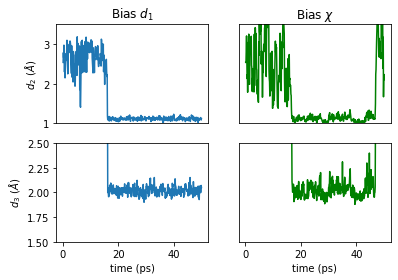

In [3]:
plt.subplot(2, 2, 1)
plt.plot(t[0:500],d2_d1[0:500])
plt.title("Bias $d_1$")
plt.ylabel("$d_2$ ($\AA$)")
plt.xticks([])
plt.ylim([1.0,3.5])

plt.subplot(2, 2, 2)
plt.plot(t[0:500],d2_chi[0:500],'g')
plt.title("Bias $\chi$")
plt.xticks([])
plt.yticks([])
plt.ylim([1.0,3.5])

plt.subplot(2, 2, 3)
plt.plot(t[0:500],d3_d1[0:500])
plt.xlabel("time (ps)")
plt.ylabel("$d_3$ ($\AA$)")
plt.ylim([1.5,2.5])

plt.subplot(2, 2, 4)
plt.plot(t[0:500],d3_chi[0:500],'g')
plt.xlabel("time (ps)")
plt.yticks([])
plt.ylim([1.5,2.5])

plt.show()

This shows the importance of orthogonal degrees of freedom. When biasing $d_1$, we're implicitly assuming that the approach of the HBr molecule (and, conversely, dissociation of C-H and C-Br bonds) is governed by "fast" degrees of freedom. However, we see that motion along these degrees of freedom is actually quite limited if we don't bias them. These issues are most apparant in the reverse reaction, where the trajectory of $d_1$ reaches values you'd associate with the reactant basin, while not actually transitioning.

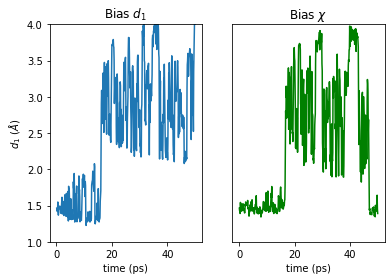

In [4]:
plt.subplot(1, 2, 1)
plt.plot(t[0:500],d1_d1[0:500])
plt.title("Bias $d_1$")
plt.xlabel("time (ps)")
plt.ylabel("$d_1$ ($\AA$)")
plt.ylim([1.0,4.0])

plt.subplot(1, 2, 2)
plt.plot(t[0:500],d1_chi[0:500],'g')
plt.title("Bias $\chi$")
plt.xlabel("time (ps)")
plt.yticks([])
plt.ylim([1.0,4.0])

plt.show()

But actually, $d_1$ is a mediocre reaction coordinate in general, since the bias exhibits hysteresis in both basins: metadynamics just keeps dumping bias into the basin untill we transition, so excess bias is a sign of a poor CV.

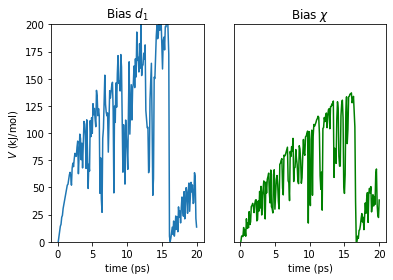

In [5]:
plt.subplot(1, 2, 1)
plt.plot(t[0:200],bias_d1[0:200])
plt.title("Bias $d_1$")
plt.xlabel("time (ps)")
plt.ylabel("$V$ (kJ/mol)")
plt.ylim([0,200])

plt.subplot(1, 2, 2)
plt.plot(t[0:200],bias_chi[0:200],'g')
plt.title("Bias $\chi$")
plt.xlabel("time (ps)")
plt.yticks([])
plt.ylim([0,200])

plt.show()

**Further questions & exercises:**
1. Metadynamics' tendency to "keep pushing" even when using bad CVs is a blessing and curse. Discuss.
2. Chemists: what's the selectivity problem biasing $d_1$ might run into? (And why were we lucky in this particular setup?)
3. The same CV $\chi$ was employed in [this paper](https://doi.org/10.1021/acs.jctc.1c00574) of mine (all PLUMED inputs are [here](https://www.plumed-nest.org/eggs/21/020/)). I compare the convergence behavior of a few diferent approaches in terms of estimated free energies.
4. Multi-class extensions of HLDA are also available, as discussed in [this paper](https://doi.org/10.1021/acs.jctc.8b00634). There's also an application to this particular system.